## Classification of Belgium traffic sign images using Neural Nets

Uses a neural network with 3 hidden layers

stochastic gradient descent as optimizer

learning rate = 0.001

loss function = categorical_crossentropy

In [3]:
import tensorflow as tf
import sklearn as sk
import os
import skimage
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

Using TensorFlow backend.


### Data is avaiable at https://btsd.ethz.ch/shareddata/

In [4]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    images = np.array(images)
    labels = np.array(labels)
    images28 = [skimage.transform.resize(image, (28, 28)) for image in images]
    images28 = np.array(images28)
    images28 = skimage.color.rgb2gray(images28)
    images28 = np.array(images28)
    return images28, labels

train_data_directory = "Training"
test_data_directory = "Testing"

In [5]:
# load trainning data

images, labels = load_data(train_data_directory)
train_x = np.reshape(images, (4575, 784))
train_y = keras.utils.to_categorical(labels, 62)

# load test data
images, labels = load_data(test_data_directory)
test_x = np.reshape(images, (2520, 784))
test_y = keras.utils.to_categorical(labels, 62)

c:\program files\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\program files\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [6]:
# define Model
model = Sequential()
model.add(Dense(units = 128, activation="relu", input_shape = (784,)))
model.add(Dense(units = 128, activation="relu"))
model.add(Dense(units = 128, activation="relu"))
model.add(Dense(units=62,activation="softmax"))
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [7]:
# train Model
history = model.fit(train_x,train_y,validation_data = (test_x, test_y), batch_size=32,epochs=300,verbose=2)

Train on 4575 samples, validate on 2520 samples
Epoch 1/300
 - 3s - loss: 4.1142 - acc: 0.0422 - val_loss: 4.1377 - val_acc: 0.0540
Epoch 2/300
 - 1s - loss: 4.0439 - acc: 0.0979 - val_loss: 4.0763 - val_acc: 0.0579
Epoch 3/300
 - 0s - loss: 3.9714 - acc: 0.1023 - val_loss: 4.0103 - val_acc: 0.0325
Epoch 4/300
 - 0s - loss: 3.8905 - acc: 0.0842 - val_loss: 3.9362 - val_acc: 0.0270
Epoch 5/300
 - 0s - loss: 3.8058 - acc: 0.0820 - val_loss: 3.8545 - val_acc: 0.0298
Epoch 6/300
 - 1s - loss: 3.7249 - acc: 0.0879 - val_loss: 3.7753 - val_acc: 0.0905
Epoch 7/300
 - 0s - loss: 3.6570 - acc: 0.1102 - val_loss: 3.7179 - val_acc: 0.1365
Epoch 8/300
 - 1s - loss: 3.6044 - acc: 0.1259 - val_loss: 3.6793 - val_acc: 0.1560
Epoch 9/300
 - 0s - loss: 3.5630 - acc: 0.1316 - val_loss: 3.6461 - val_acc: 0.1790
Epoch 10/300
 - 0s - loss: 3.5285 - acc: 0.1480 - val_loss: 3.6192 - val_acc: 0.2075
Epoch 11/300
 - 1s - loss: 3.4974 - acc: 0.1703 - val_loss: 3.5893 - val_acc: 0.2226
Epoch 12/300
 - 1s - loss:

Epoch 97/300
 - 0s - loss: 1.3409 - acc: 0.6986 - val_loss: 1.4105 - val_acc: 0.6571
Epoch 98/300
 - 0s - loss: 1.3297 - acc: 0.7049 - val_loss: 1.4063 - val_acc: 0.6631
Epoch 99/300
 - 0s - loss: 1.3179 - acc: 0.7023 - val_loss: 1.3784 - val_acc: 0.6742
Epoch 100/300
 - 0s - loss: 1.3054 - acc: 0.7067 - val_loss: 1.3692 - val_acc: 0.6889
Epoch 101/300
 - 0s - loss: 1.2939 - acc: 0.7099 - val_loss: 1.3670 - val_acc: 0.6806
Epoch 102/300
 - 0s - loss: 1.2821 - acc: 0.7119 - val_loss: 1.3530 - val_acc: 0.6833
Epoch 103/300
 - 0s - loss: 1.2721 - acc: 0.7139 - val_loss: 1.3397 - val_acc: 0.6853
Epoch 104/300
 - 0s - loss: 1.2604 - acc: 0.7141 - val_loss: 1.3428 - val_acc: 0.6845
Epoch 105/300
 - 0s - loss: 1.2498 - acc: 0.7152 - val_loss: 1.3232 - val_acc: 0.6964
Epoch 106/300
 - 0s - loss: 1.2392 - acc: 0.7176 - val_loss: 1.3185 - val_acc: 0.6837
Epoch 107/300
 - 0s - loss: 1.2280 - acc: 0.7202 - val_loss: 1.2993 - val_acc: 0.6972
Epoch 108/300
 - 0s - loss: 1.2183 - acc: 0.7209 - val_lo

Epoch 193/300
 - 0s - loss: 0.6885 - acc: 0.8245 - val_loss: 0.8287 - val_acc: 0.7952
Epoch 194/300
 - 0s - loss: 0.6844 - acc: 0.8291 - val_loss: 0.8454 - val_acc: 0.7929
Epoch 195/300
 - 0s - loss: 0.6811 - acc: 0.8317 - val_loss: 0.8168 - val_acc: 0.7992
Epoch 196/300
 - 0s - loss: 0.6772 - acc: 0.8282 - val_loss: 0.8210 - val_acc: 0.7972
Epoch 197/300
 - 0s - loss: 0.6726 - acc: 0.8291 - val_loss: 0.8277 - val_acc: 0.7933
Epoch 198/300
 - 0s - loss: 0.6699 - acc: 0.8350 - val_loss: 0.8170 - val_acc: 0.8012
Epoch 199/300
 - 0s - loss: 0.6659 - acc: 0.8302 - val_loss: 0.8098 - val_acc: 0.7956
Epoch 200/300
 - 0s - loss: 0.6623 - acc: 0.8330 - val_loss: 0.7943 - val_acc: 0.8020
Epoch 201/300
 - 0s - loss: 0.6579 - acc: 0.8348 - val_loss: 0.8012 - val_acc: 0.8004
Epoch 202/300
 - 0s - loss: 0.6545 - acc: 0.8365 - val_loss: 0.8026 - val_acc: 0.7964
Epoch 203/300
 - 0s - loss: 0.6513 - acc: 0.8365 - val_loss: 0.8111 - val_acc: 0.7988
Epoch 204/300
 - 0s - loss: 0.6477 - acc: 0.8356 - val

Epoch 289/300
 - 0s - loss: 0.4304 - acc: 0.8955 - val_loss: 0.6684 - val_acc: 0.8242
Epoch 290/300
 - 0s - loss: 0.4286 - acc: 0.8979 - val_loss: 0.6720 - val_acc: 0.8274
Epoch 291/300
 - 0s - loss: 0.4269 - acc: 0.8964 - val_loss: 0.6611 - val_acc: 0.8278
Epoch 292/300
 - 0s - loss: 0.4245 - acc: 0.8966 - val_loss: 0.6683 - val_acc: 0.8238
Epoch 293/300
 - 0s - loss: 0.4228 - acc: 0.8981 - val_loss: 0.6608 - val_acc: 0.8278
Epoch 294/300
 - 0s - loss: 0.4220 - acc: 0.8966 - val_loss: 0.6617 - val_acc: 0.8238
Epoch 295/300
 - 0s - loss: 0.4203 - acc: 0.8990 - val_loss: 0.6816 - val_acc: 0.8222
Epoch 296/300
 - 0s - loss: 0.4177 - acc: 0.8984 - val_loss: 0.6753 - val_acc: 0.8238
Epoch 297/300
 - 0s - loss: 0.4163 - acc: 0.9010 - val_loss: 0.6669 - val_acc: 0.8246
Epoch 298/300
 - 1s - loss: 0.4141 - acc: 0.9003 - val_loss: 0.6683 - val_acc: 0.8258
Epoch 299/300
 - 0s - loss: 0.4127 - acc: 0.9016 - val_loss: 0.6664 - val_acc: 0.8298
Epoch 300/300
 - 0s - loss: 0.4107 - acc: 0.9008 - val

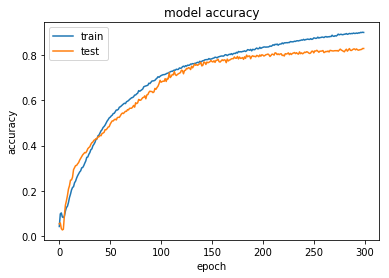

In [8]:
# plot of accuray with iterations
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

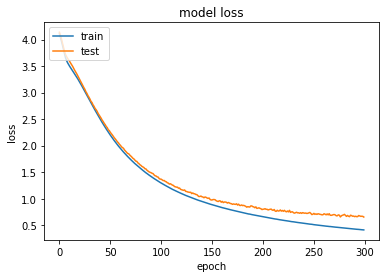

In [9]:
# plot of loss with iterations
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Results

After hyperparameter tuning got a classification accuray of 82.9% with this model

Will have to experiment with CNN to improve the results